In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Sinusodial Gratings
$$g(x,y)=Asin(2πf(xcosθ+ysinθ)+ϕ)$$

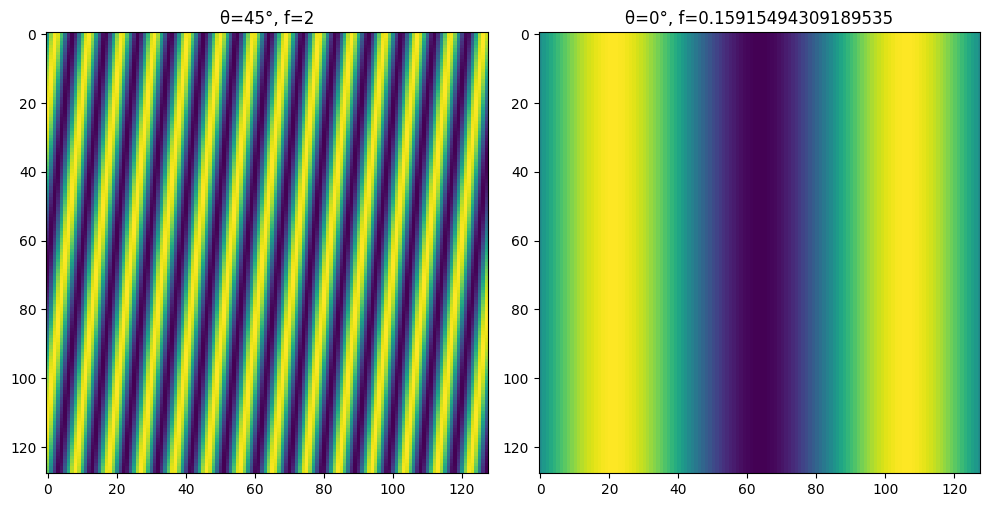

In [27]:
def sinusoidal_grating(A, f, theta, phi, grid_x, grid_y):
    '''
    Takes a grid, amplititude, frequence, phase and an angle orientation and returns the sinusoidal grating
    grid_x: (M x N)
    grid_y: (N x M)
    '''
    rotated_grid_x = grid_x * np.cos(theta) + grid_y * np.sin(theta)
    grating = A * np.sin(2 * np.pi * f * (rotated_grid_x) + phi)
    return grating


def plot_sinusoidal_grating():
    grid_size = 128
    x = np.linspace(0, 3 * np.pi, grid_size)
    y = np.linspace(0, 1, grid_size)
    phi = 0
    A = 10
    grid_x, grid_y = np.meshgrid(x, y)
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))

    params = [
        {'theta': np.pi/4, 'f': 2},  # 45 degrees, lower frequency
        {'theta': 0, 'f': 1/(2*np.pi)}, # horizontal at a natural sine frequency
    ]

    for ax, param in zip(axes.flat, params):
        grating = sinusoidal_grating(A, param['f'], param['theta'], phi, grid_x, grid_y)
        im = ax.imshow(grating)
        ax.set_title(f"θ={param['theta']*180/np.pi:.0f}°, f={param['f']}")

    plt.tight_layout()

plot_sinusoidal_grating()



# Drifting Sinusodial Grating
$$g(x,y,t)=Asin(2πf(xcosθ+ysinθ)+\phi-2πft)$$



In [41]:
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline


grid_size = 128
x = np.linspace(0, 10 * np.pi, grid_size)
y = np.linspace(0, 10 * np.pi, grid_size)
f = 1/(2*np.pi) # cycles per degree
time_freq = 10 # cycles per second
theta = np.pi/4 # 45 degrees
phi = 0
A = 10
frames = 100
drifting_grid = np.zeros((frames, grid_size, grid_size))

# Generate each frame with incrementing phase shift
for t in range(frames):
    # Re-use existing sinusoidal_grating function with updated phase
    phase_shift = phi - 2*np.pi*time_freq*(t/frames)
    grid_x, grid_y = np.meshgrid(x, y)
    drifting_grid[t] = sinusoidal_grating(
        A=A,
        f=f, 
        theta=theta,
        phi=phase_shift,
        grid_x=grid_x,
        grid_y=grid_y
    )

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 8))

# Initialize the plot with the first frame
im = ax.imshow(drifting_grid[0], animated=True, cmap='gray', vmin=-1, vmax=1)
ax.set_title(f"θ={theta*180/np.pi:.0f}°, f={f}")

# Animation update function
def update(frame):
    im.set_array(drifting_grid[frame])
    return [im]

# Create the animation
anim = animation.FuncAnimation(
    fig, update, frames=frames,
    interval=50, blit=True
)
plt.close()
HTML(anim.to_jshtml())

